In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import  model_selection, metrics

In [ ]:
#人口

In [17]:
filename = '/Users/zuiyou/Desktop/ybyv3.xlsx'
predata = pd.read_excel(filename,'Sheet1')

print(predata.shape)

(28055, 23)


In [18]:
predata.head()

,ID,gender_female,gender_male,tea_age_(15-25],tea_age_(5-15],tea_age_25+,tea_age_[0~5],degree_Bachelor,degree_College,degree_Master+,...,subject_minor,location_city,location_town,location_village,phase_junior,phase_primary,phase_senior,label_0,label_1,label_2
0,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,2,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,3,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,4,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
4,6,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


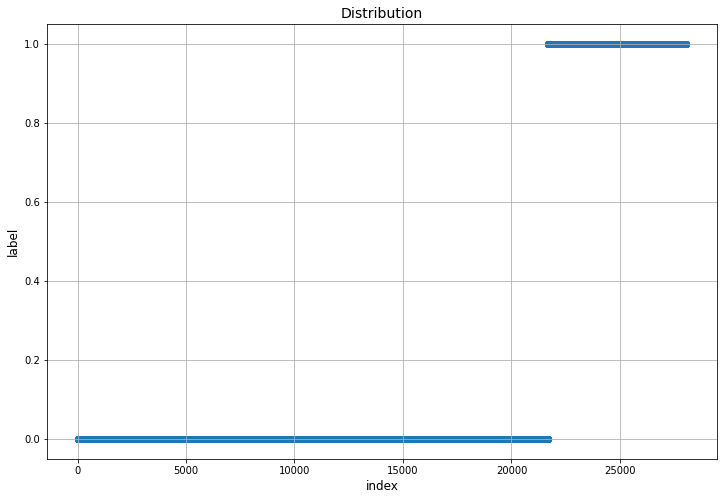

In [19]:
plt.figure(figsize=(12, 8))
plt.scatter(range(predata.shape[0]), np.sort(predata.label_0.values))
plt.grid()
plt.xlabel('index', fontsize=12)
plt.ylabel('label', fontsize=12)
plt.title("Distribution", fontsize=14)
plt.show()

Text(0.5, 1.0, 'Target Histogram')

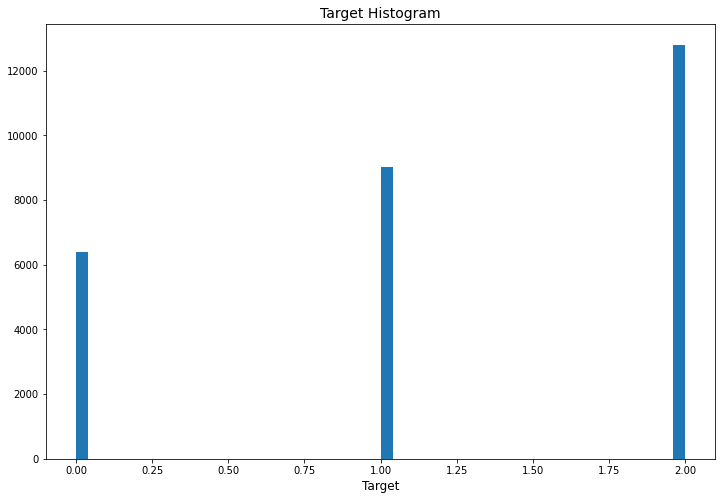

In [7]:
plt.figure(figsize=(12,8))
plt.hist(predata.label.values, bins=50)
plt.xlabel('Target', fontsize=12)
plt.title("Target Histogram", fontsize=14)

In [20]:
corr_df0 = predata.corr(method = 'spearman')['label_0']
corr_df1 = predata.corr(method = 'spearman')['label_1']
corr_df2 = predata.corr(method = 'spearman')['label_2']

In [21]:
corr_df0

ID                  0.002132
gender_female       0.002207
gender_male        -0.002207
tea_age_(15-25]    -0.045729
tea_age_(5-15]     -0.005643
tea_age_25+        -0.023331
tea_age_[0~5]       0.073473
degree_Bachelor     0.035624
degree_College     -0.037600
degree_Master+      0.010026
major_non-normal    0.011394
major_normal       -0.011394
subject_majority   -0.023911
subject_minor       0.023911
location_city       0.065516
location_town       0.046341
location_village   -0.087182
phase_junior        0.004287
phase_primary      -0.014072
phase_senior        0.020464
label_0             1.000000
label_1            -0.371246
label_2            -0.493174
Name: label_0, dtype: float64

<AxesSubplot:title={'center':'Correlation of variables'}>

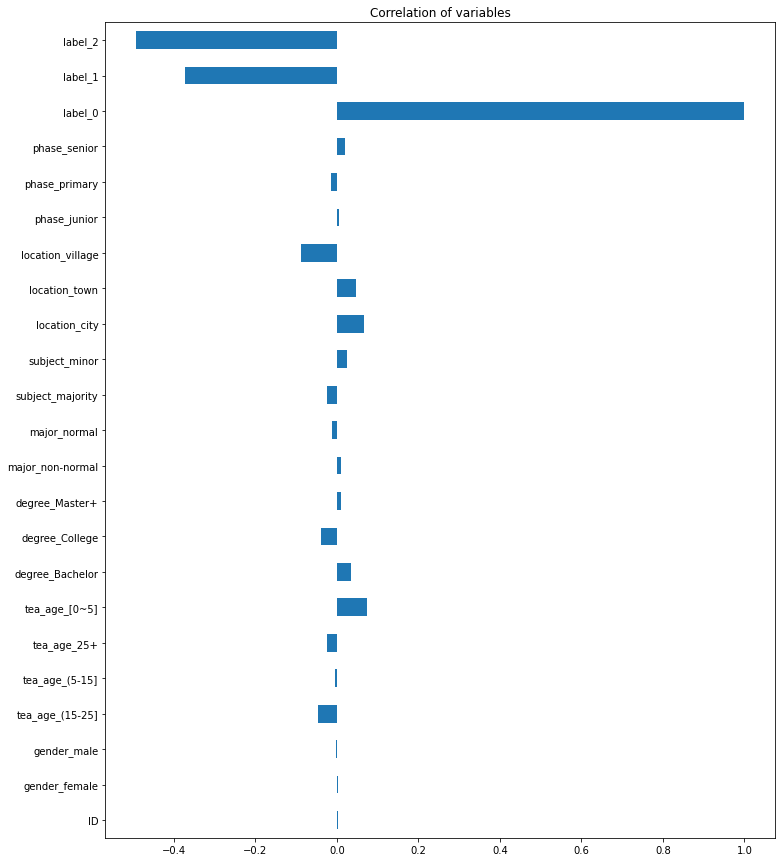

In [22]:
corr_df0.plot(kind='barh', figsize = (12,15), title='Correlation of variables')

In [23]:
corr_df1

ID                  0.006911
gender_female      -0.005265
gender_male         0.005265
tea_age_(15-25]     0.046869
tea_age_(5-15]      0.000403
tea_age_25+         0.040588
tea_age_[0~5]      -0.085528
degree_Bachelor    -0.051213
degree_College      0.054565
degree_Master+     -0.017236
major_non-normal   -0.005425
major_normal        0.005425
subject_majority    0.008304
subject_minor      -0.008304
location_city      -0.060295
location_town      -0.050901
location_village    0.087782
phase_junior       -0.000285
phase_primary       0.014098
phase_senior       -0.028422
label_0            -0.371246
label_1             1.000000
label_2            -0.624672
Name: label_1, dtype: float64

<AxesSubplot:title={'center':'Correlation of variables'}>

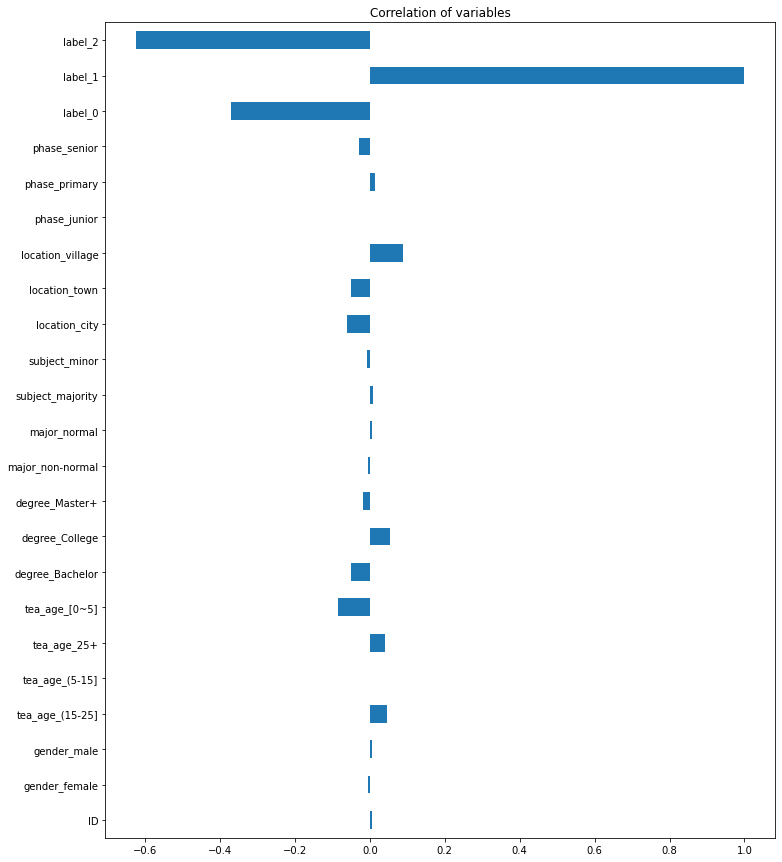

In [24]:
corr_df1.plot(kind='barh', figsize = (12,15), title='Correlation of variables')

In [25]:
corr_df2

ID                 -0.008267
gender_female       0.003076
gender_male        -0.003076
tea_age_(15-25]    -0.005453
tea_age_(5-15]      0.004368
tea_age_25+        -0.018405
tea_age_[0~5]       0.018340
degree_Bachelor     0.018022
degree_College     -0.019499
degree_Master+      0.007716
major_non-normal   -0.004500
major_normal        0.004500
subject_majority    0.012329
subject_minor      -0.012329
location_city       0.001391
location_town       0.008716
location_village   -0.008923
phase_junior       -0.003338
phase_primary      -0.001374
phase_senior        0.009418
label_0            -0.493174
label_1            -0.624672
label_2             1.000000
Name: label_2, dtype: float64

<AxesSubplot:title={'center':'Correlation of variables'}>

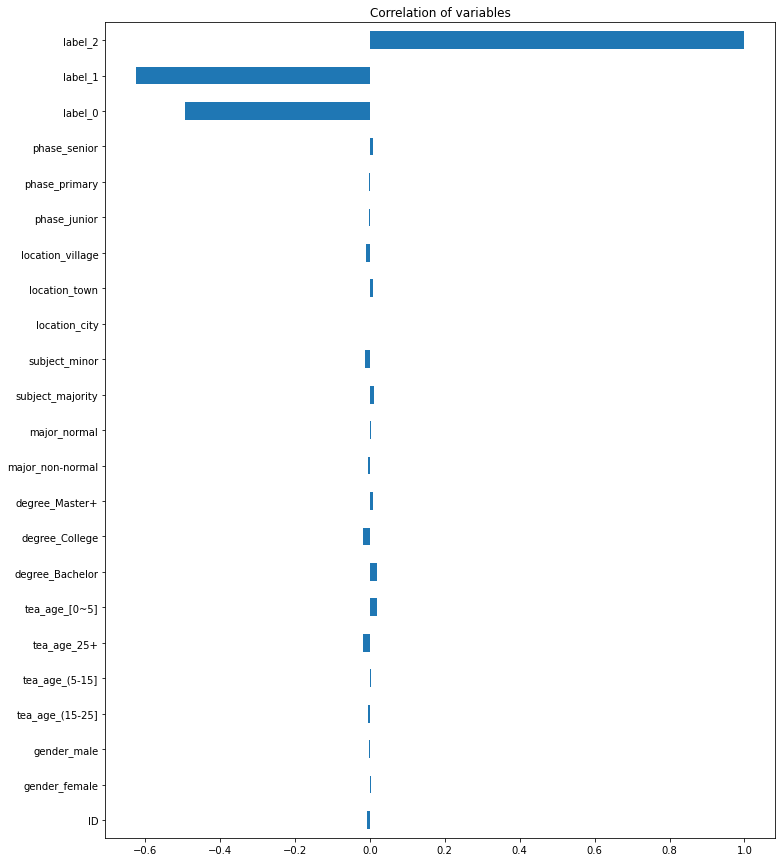

In [26]:
corr_df2.plot(kind='barh', figsize = (12,15), title='Correlation of variables')

In [ ]:
#学校

In [27]:
predata1 = pd.read_excel(filename,'Sheet2')
predata1.head()

,ID,S1_No,S1_Yes,S2_0,S2_1~2,S2_3~4,S2_5~6,S2_7+,S3_Space_No,S3_Space_Yes,...,S24_2~3,S24_4+,S25_0,S25_1+,S26_0,S26_1~3,S26_4+,label_0,label_1,label_2
0,1,1,0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
1,2,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3,1,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
3,4,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,6,1,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1


In [29]:
corr_df0 = predata1.corr(method = 'spearman')['label_0']
corr_df1 = predata1.corr(method = 'spearman')['label_1']
corr_df2 = predata1.corr(method = 'spearman')['label_2']
corr_df0

ID         0.002132
S1_No     -0.199945
S1_Yes     0.199945
S2_0      -0.037038
S2_1~2    -0.057486
             ...   
S26_1~3    0.010575
S26_4+     0.005132
label_0    1.000000
label_1   -0.371246
label_2   -0.493174
Name: label_0, Length: 90, dtype: float64

In [30]:
corr_df1

ID         0.006911
S1_No      0.276454
S1_Yes    -0.276454
S2_0       0.053125
S2_1~2     0.077337
             ...   
S26_1~3   -0.016530
S26_4+    -0.010123
label_0   -0.371246
label_1    1.000000
label_2   -0.624672
Name: label_1, Length: 90, dtype: float64

In [31]:
corr_df2

ID        -0.008267
S1_No     -0.090855
S1_Yes     0.090855
S2_0      -0.018624
S2_1~2    -0.024111
             ...   
S26_1~3    0.006594
S26_4+     0.005168
label_0   -0.493174
label_1   -0.624672
label_2    1.000000
Name: label_2, Length: 90, dtype: float64

<AxesSubplot:title={'center':'Correlation of variables'}>

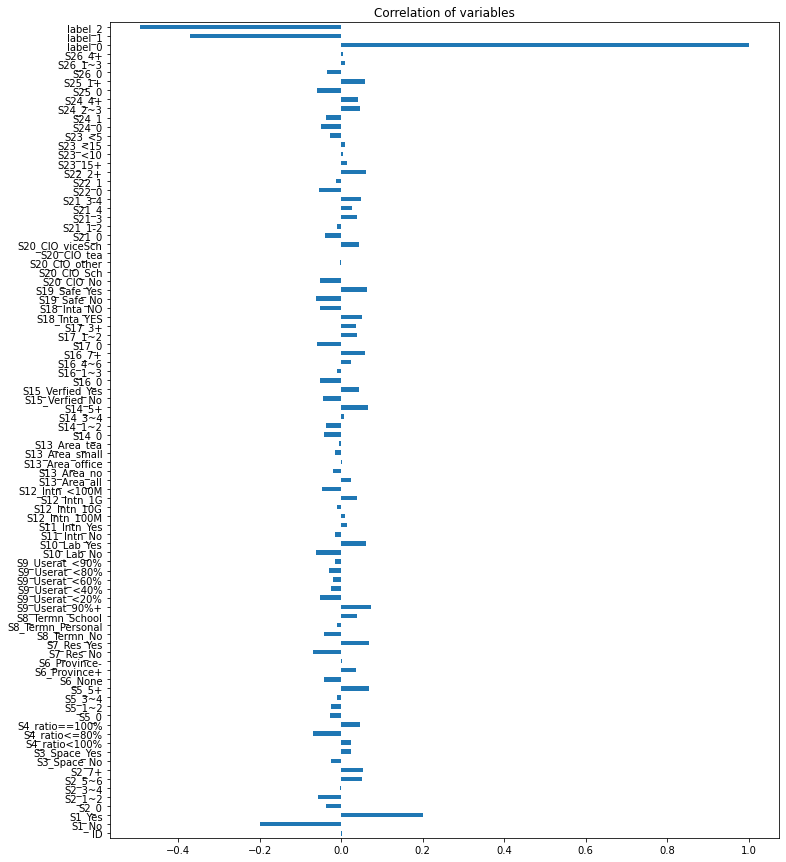

In [32]:
corr_df0.plot(kind='barh', figsize = (12,15), title='Correlation of variables')

<AxesSubplot:title={'center':'Correlation of variables'}>

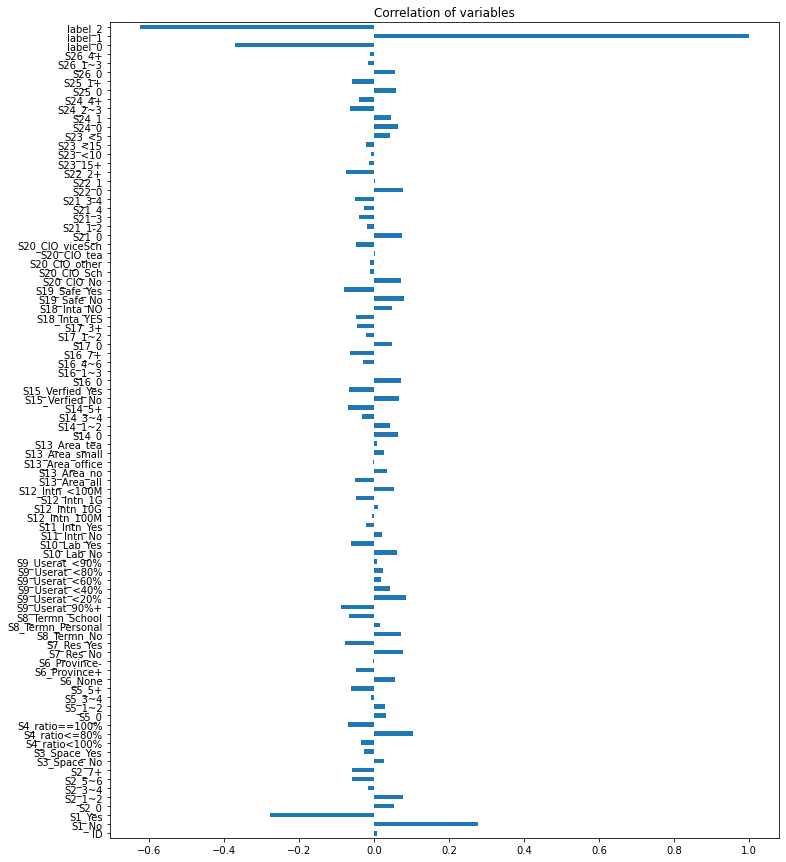

In [33]:
corr_df1.plot(kind='barh', figsize = (12,15), title='Correlation of variables')

<AxesSubplot:title={'center':'Correlation of variables'}>

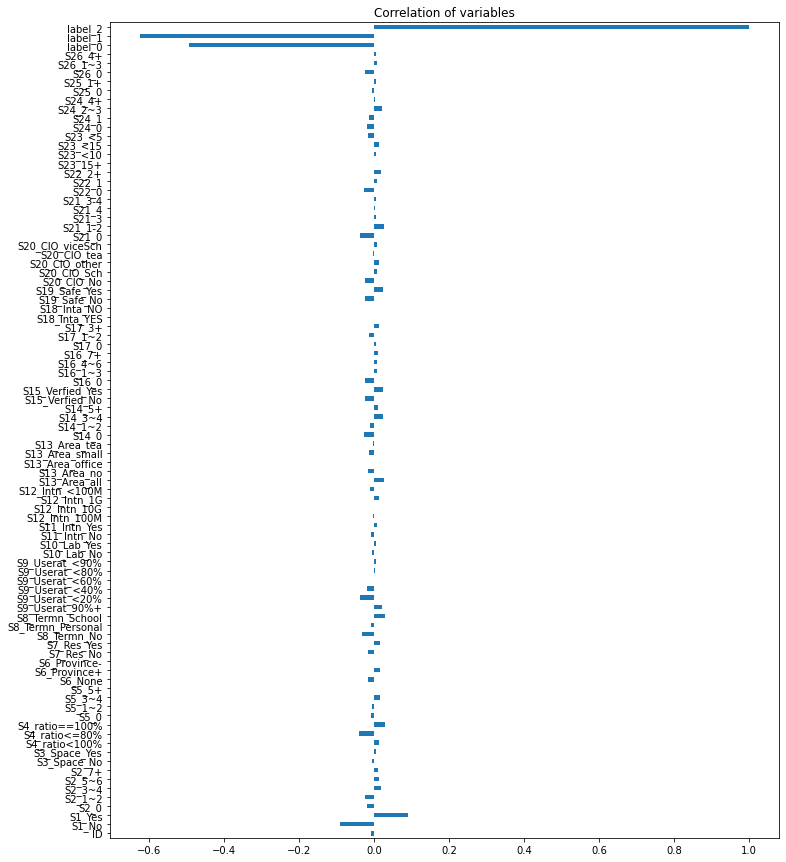

In [34]:
corr_df2.plot(kind='barh', figsize = (12,15), title='Correlation of variables')

In [35]:
#培训

In [37]:
predata2 = pd.read_excel(filename,'Sheet3')
predata2.head()

,ID,TT1_0,TT1_1~2,TT1_3~5,TT1_6+,TT2_0,TT2_1~2,TT2_3~5,TT2_6+,TT3_0,...,TT3_40+,TT3_5~10,TT3_<5,TT4_0,TT4_1~2,TT4_3~4,TT4_5+,label_0,label_1,label_2
0,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
1,2,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,3,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,4,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,6,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [38]:
corr_df0 = predata2.corr(method = 'spearman')['label_0']
corr_df1 = predata2.corr(method = 'spearman')['label_1']
corr_df2 = predata2.corr(method = 'spearman')['label_2']
corr_df0

ID           0.002132
TT1_0       -0.004444
TT1_1~2      0.002873
TT1_3~5      0.003390
TT1_6+      -0.003509
TT2_0        0.001109
TT2_1~2      0.008699
TT2_3~5     -0.007471
TT2_6+       0.000672
TT3_0       -0.009930
TT3_10~40   -0.001035
TT3_40+      0.003868
TT3_5~10     0.002893
TT3_<5       0.004598
TT4_0       -0.003481
TT4_1~2     -0.005578
TT4_3~4      0.006666
TT4_5+      -0.000223
label_0      1.000000
label_1     -0.371246
label_2     -0.493174
Name: label_0, dtype: float64

In [39]:
corr_df1

ID           0.006911
TT1_0       -0.003337
TT1_1~2      0.006040
TT1_3~5     -0.002293
TT1_6+      -0.001764
TT2_0       -0.004543
TT2_1~2      0.000195
TT2_3~5      0.001021
TT2_6+       0.005660
TT3_0       -0.001340
TT3_10~40    0.003706
TT3_40+     -0.003751
TT3_5~10     0.003266
TT3_<5      -0.002502
TT4_0       -0.007413
TT4_1~2     -0.000562
TT4_3~4      0.002477
TT4_5+      -0.000076
label_0     -0.371246
label_1      1.000000
label_2     -0.624672
Name: label_1, dtype: float64

In [40]:
corr_df2

ID          -0.008267
TT1_0        0.006863
TT1_1~2     -0.008075
TT1_3~5     -0.000703
TT1_6+       0.004603
TT2_0        0.003323
TT2_1~2     -0.007499
TT2_3~5      0.005326
TT2_6+      -0.005867
TT3_0        0.009606
TT3_10~40   -0.002602
TT3_40+      0.000262
TT3_5~10    -0.005493
TT3_<5      -0.001522
TT4_0        0.009873
TT4_1~2      0.005218
TT4_3~4     -0.007926
TT4_5+       0.000258
label_0     -0.493174
label_1     -0.624672
label_2      1.000000
Name: label_2, dtype: float64

<AxesSubplot:title={'center':'Correlation of variables'}>

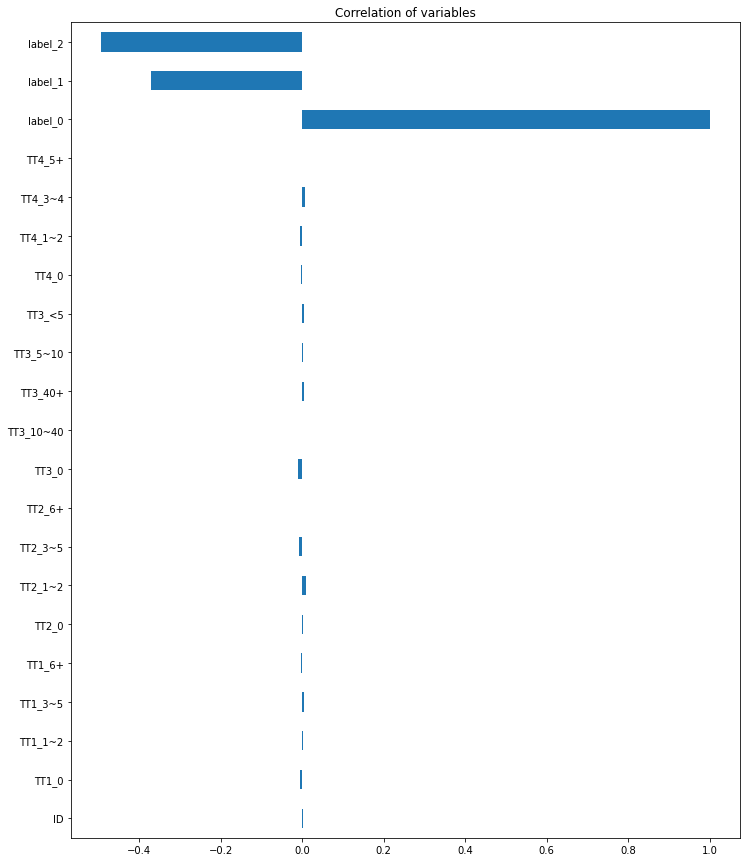

In [42]:
corr_df0.plot(kind='barh', figsize = (12,15), title='Correlation of variables')

<AxesSubplot:title={'center':'Correlation of variables'}>

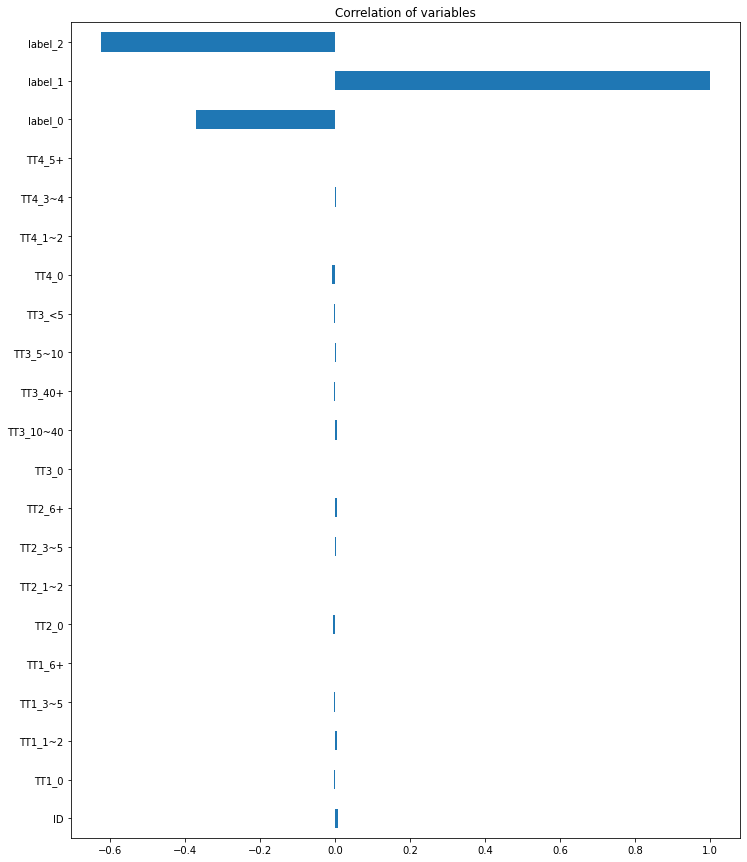

In [43]:
corr_df1.plot(kind='barh', figsize = (12,15), title='Correlation of variables')

<AxesSubplot:title={'center':'Correlation of variables'}>

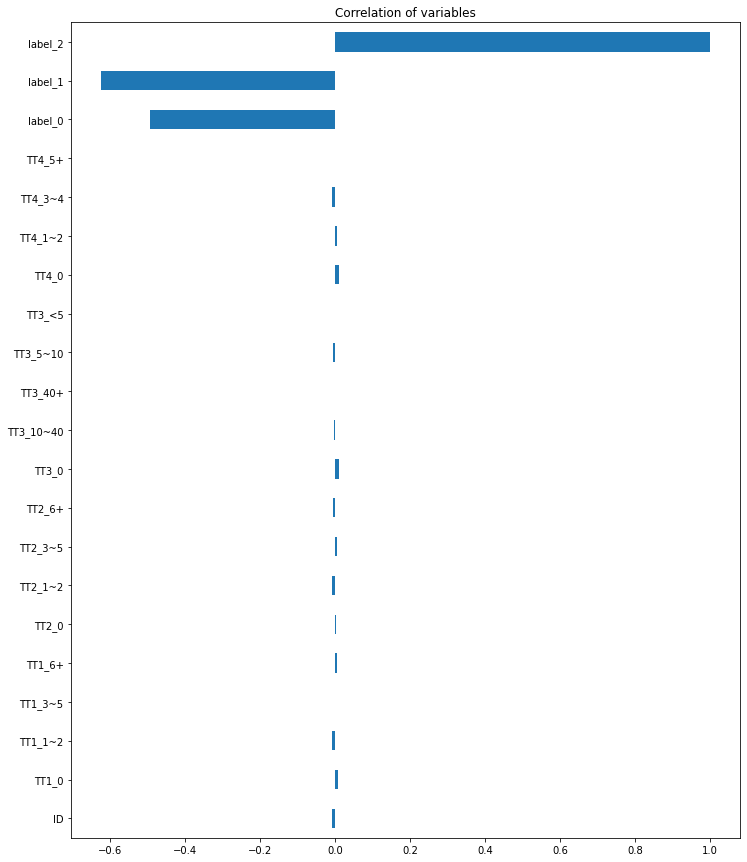

In [44]:
corr_df2.plot(kind='barh', figsize = (12,15), title='Correlation of variables')